
0: 640x480 1 green, 43.6ms
Speed: 25.7ms preprocess, 43.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


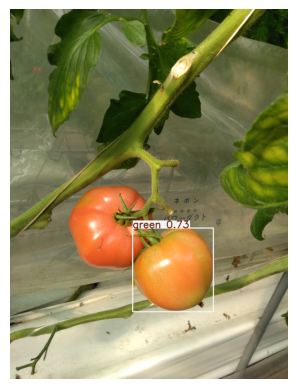

In [1]:
import autorootcwd
from ultralytics import YOLO
import cv2 as cv
import matplotlib.pyplot as plt
import torch

device_arg = 0 if torch.cuda.is_available() else "cpu"

yolo_model = YOLO("model/best.pt")
image_path = "data/notebook_data/IMG_20191215_111753.jpg"
image = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

# YOLO 추론
yolo_result = yolo_model(image)
predicted_image = yolo_result[0].plot()


plt.imshow(predicted_image)
plt.axis('off')
plt.show()

In [2]:
yolo_box_coords = yolo_result[0].boxes.xyxy
len(yolo_box_coords)

1

In [3]:
yolo_result[0].plot()

array([[[ 25,  46,   3],
        [ 26,  47,   4],
        [ 27,  48,   5],
        ...,
        [ 13,  53,   3],
        [ 11,  51,   1],
        [ 11,  51,   1]],

       [[ 25,  46,   3],
        [ 26,  47,   4],
        [ 27,  48,   5],
        ...,
        [ 13,  53,   3],
        [ 12,  52,   2],
        [ 11,  51,   1]],

       [[ 25,  46,   3],
        [ 26,  47,   4],
        [ 27,  48,   5],
        ...,
        [ 14,  52,   3],
        [ 13,  51,   2],
        [ 13,  51,   2]],

       ...,

       [[206, 203, 172],
        [206, 203, 172],
        [205, 202, 171],
        ...,
        [ 99,  78,  47],
        [ 96,  75,  44],
        [ 94,  73,  42]],

       [[206, 203, 172],
        [206, 203, 172],
        [205, 202, 171],
        ...,
        [ 98,  77,  46],
        [ 97,  76,  45],
        [ 96,  75,  44]],

       [[206, 203, 172],
        [205, 202, 171],
        [205, 202, 171],
        ...,
        [ 98,  77,  46],
        [ 99,  78,  47],
        [100,  79,  48]]

감지된 박스 개수: 1
FastSAM에 전달할 박스 좌표: tensor([[1376.8696, 2462.0950, 2282.4937, 3403.6047]], device='cuda:0')

0: 640x480 1 object, 28.8ms
Speed: 1.6ms preprocess, 28.8ms inference, 154.9ms postprocess per image at shape (1, 3, 640, 480)


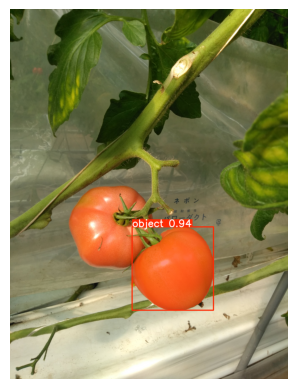

In [4]:
from ultralytics import FastSAM
import matplotlib.pyplot as plt


if len(yolo_box_coords) == 0:
    print("no detections; skip FastSAM prompt")
else:
    print(f"감지된 박스 개수: {len(yolo_box_coords)}")
    print(f"FastSAM에 전달할 박스 좌표: {yolo_box_coords}")
 
    # 2) Run FastSAM with all YOLO bboxes as prompts
    fastsam = FastSAM("model/FastSAM-s.pt")
    fastsam_results = fastsam.predict(source= image, bboxes=yolo_box_coords, device=device_arg,
                          retina_masks=True, imgsz=640, conf=0.5, iou=0.9)

    # 3) Plot
    annotated_image = fastsam_results[0].plot()
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.show()

In [5]:
print(f"image.shape : {image.shape} \n type(image) : {type(image)}")

image.shape : (4160, 3120, 3) 
 type(image) : <class 'numpy.ndarray'>


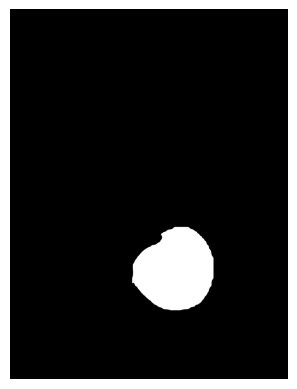

In [6]:
import numpy as np

# NumPy 출력 옵션 설정 (전체 값 보기)
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

masks = fastsam_results[0].masks.data.cpu().numpy() 

# 마스크가 여러개면 합치기 (OR 연산) 
if len(masks.shape) >= 2 : 
    binary_mask = np.any(masks > 0 , axis = 0)
else :
    binary_mask = masks

binary_image = (binary_mask * 255).astype(np.uint8)

plt.imshow(binary_image , cmap = "gray")
plt.axis('off')
plt.show()

In [7]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

binary_image

KeyboardInterrupt: 

In [ ]:
# 원래 tensor 가 깊 세 가 순서임 
print(f"masks.shape : {masks.shape} \n type(masks) : {type(masks)} \n masks.dtype : {masks.dtype}")